Source :https://stackoverflow.com/questions/44049679/geojson-to-shapefile-using-python 

In [15]:
import re
import pandas as pd

In [13]:
d_IREL ={}
n=0


with open('./liste_lieux_IREL.js','r') as f:
    lignes = f.readlines()
    
#     print(lignes)
    
    for l in lignes:
        l=l.strip(r"\, ")
#         print(l)
        d_IREL[n]=l
        n+=1
d_IREL

{0: "var geographie = ['Aachen (Allemagne)'\n",
 1: "'Abala, Subdivision (République du Congo)'\n",
 2: "'Abananquem (Bénin)'\n",
 3: "'Abbaziz (Algérie)'\n",
 4: "'Abbeville (Somme ; France)'\n",
 5: "'Abbé, Lac (Djibouti/Éthiopie)'\n",
 6: "'Abbo (Algérie)'\n",
 7: "'Abdi (Algérie)'\n",
 8: "'Abd El Beg (Algérie)'\n",
 9: "'Abéché, Subdivision (Tchad)'\n",
 10: "'Abéché (Tchad)'\n",
 11: "'Abengourou (Côte d\\'Ivoire)'\n",
 12: "'Abeokuta (Nigeria)'\n",
 13: "'Abhe Bad (Djibouti)'\n",
 14: "'Abidjan/Agboville, Voie ferrée (Côte d\\'Ivoire)'\n",
 15: "'Abidjan/Bobo Dioulasso, Voie ferrée (Côte d\\'Ivoire/Burkina Faso)'\n",
 16: "'Abidjan/Bouaké, Voie ferrée (Côte d\\'Ivoire)'\n",
 17: "'Abidjan/Gagnoa, Route (Côte d\\'Ivoire)'\n",
 18: "'Abidjan/Niger, Voie ferrée (Côte d\\'Ivoire/Burkina Faso)'\n",
 19: "'Abidjan/Ouagadougou, Voie ferrée (Côte d\\'Ivoire/Burkina Faso)'\n",
 20: "'Abidjan/Port-Bouët, Voie ferrée (Côte d\\'Ivoire)'\n",
 21: "'Abidjan (Côte d\\'Ivoire)'\n",
 22: "'Abid 

In [14]:
df_IREL = pd.DataFrame.from_dict(d_IREL,orient='index')
df_IREL = df_IREL.rename(columns={0:'titre'})

#Nettoyage du df : 

df_IREL=df_IREL.titre.str.split(r"\n",expand=True) #sauts à la ligne
df_IREL=df_IREL[0].str.split(r"\(",expand=True)#diviser les lieux dit de leur région d'appartenance
df_IREL[1]=df_IREL[1].str.replace(r"\)\'?'","")#
df_IREL[0]=df_IREL[0].str.replace(r"\'","")#

#Exctraction de la 1e colonne qui contient parfois le statut administratif de la localité
dfBis = df_IREL[0].str.split(r"\, ",expand=True)

dfBis=dfBis.rename(columns={0:"localité",1:"type",2:"inutile"})

#concaténer le df de départ et celui avec les statuts administratifs

df_IREL= pd.concat([df_IREL,dfBis],axis=1)
NewColNames=["Localité","Administration","Lieu-dit","Type","Inutile"]
df_IREL.rename(columns=dict(zip(df_IREL.columns,NewColNames)),inplace=True)

#la colonne Localité ne sert plus à rien puisqu'on a "Lieu-dit"
df_IREL = df_IREL.drop(columns=["Localité"])


In [4]:
df_IREL.to_csv("./essai.csv")

In [16]:
df_IREL

,Administration,Lieu-dit,Type,Inutile
0,Allemagne,var geographie = [Aachen,None,None
1,République du Congo,Abala,Subdivision,None
2,Bénin,Abananquem,None,None
3,Algérie,Abbaziz,None,None
4,Somme ; France,Abbeville,None,None
...,...,...,...,...
14566,Allemagne,Zusenhofen,None,None
14567,Nord ; France,Zuytpeene,None,None
14568,Algérie,Z\Mala,None,None
14569,Algérie,Z’Malet El Emir Abdelkader,None,None


In [5]:
## Faire lien avec les données wikidata de GPH

In [6]:
#GPH entities avec lien wikidata

df_wikiData = pd.read_csv("../GeoPolHist-202103/medialab-GeoPolHist-fb19b66/data/GeoPolHist_entities.csv")
    
df_wikiData=df_wikiData.rename(columns={"GPH_name":"NAME"})


#csv complet des GPH et NAME :

#Pour ne conserver que les données qui nous intéressent, on le merge avec la base de données 
#finale de la Partie 1


In [7]:
df_IREL=df_IREL.rename(columns={"Lieu-dit":"NAME"})

In [8]:
df_WikiIREL = pd.merge(df_wikiData,df_IREL,how="inner",on="NAME")

In [9]:
df_WikiIREL

,GPH_code,NAME,continent,wikidata,wikidata_alt1,wikidata_alt2,wikidata_alt3,notes,Administration,Type,Inutile
0,2,United States of America,America,http://www.wikidata.org/entity/Q30,NaN,NaN,NaN,NaN,None,None,None
1,7,Texas,America,http://www.wikidata.org/entity/Q1439,NaN,NaN,NaN,NaN,None,Colonie espagnole,None
2,7,Texas,America,http://www.wikidata.org/entity/Q1439,NaN,NaN,NaN,NaN,États-Unis,État,None
3,7,Texas,America,http://www.wikidata.org/entity/Q1439,NaN,NaN,NaN,NaN,None,République du,None
4,10,Greenland,America,http://www.wikidata.org/entity/Q223,NaN,NaN,NaN,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
154,8153,Tonkin,Asia,http://www.wikidata.org/entity/Q1858,NaN,NaN,NaN,NaN,None,4e territoire militaire,None
155,8153,Tonkin,Asia,http://www.wikidata.org/entity/Q1858,NaN,NaN,NaN,NaN,None,Territoires militaires,None
156,8272,Penang,Asia,http://www.wikidata.org/entity/Q188096,NaN,NaN,NaN,NaN,Malaisie,Île de,None
157,8403,Mindanao,Asia,http://www.wikidata.org/entity/Q124873,NaN,NaN,NaN,NaN,"Philippines, Archipel des",Île,None


In [11]:
df_WikiIREL["GPH_code"]=df_WikiIREL["GPH_code"].drop_duplicates(keep="first")

#Ici onsouhaite avoirleurnombredans l'absolu,regardless of the GPH Status
df_WikiIREL=df_WikiIREL.loc[df_WikiIREL["GPH_code"].notnull()]
df_WikiIREL["continent"].value_counts()
df_continents = df_WikiIREL["continent"].value_counts()

<ipython-input-11-badb902847c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WikiIREL["GPH_code"]=df_WikiIREL["GPH_code"].drop_duplicates(keep="first")


<AxesSubplot:title={'center':'Proportion des lieux par continent présents sur IREL ET dans la bdd GPHE'}>

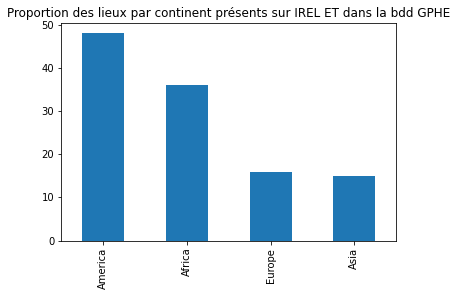

In [12]:
df_continents.plot.bar(title='Proportion des lieux par continent présents sur IREL ET dans la bdd GPHE')